In [719]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [720]:
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.min_rows', None)
pd.set_option('display.expand_frame_repr', True)

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
width = os.get_terminal_size().columns

In [721]:
cab_data = pd.read_csv("Cab_Data.csv")
transaction_id_data = pd.read_csv("Transaction_ID.csv")
customer_id_data = pd.read_csv("Customer_ID.csv")
city_data = pd.read_csv("City.csv")

print(
        "Cab_Data.csv".center(width), "\n\n\n", cab_data.head(), "\n\n\n",
        "Transaction_ID.csv".center(width), "\n\n\n", transaction_id_data.head(),"\n\n\n",
        "Customer_ID.csv".center(width), "\n\n\n", customer_id_data.head(), "\n\n\n",
        "City.csv".center(width), "\n\n\n", city_data.head()
     )

                                                      Cab_Data.csv                                                       


    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776   


                                                    Transaction_ID.csv                                                    


    Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012    

<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [722]:
print(cab_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None


In [723]:
# Adjust the dates
def days_to_date(days, origin):
    """Adds days to datetime.date objects.

Args:
    days: Integer to convert.
    origin (datetime.date object): date to be days added on.
    
Returns:
    datetime.date object: Value corresponding to the date after summation.
    """
    new = origin + dt.timedelta(days=days)
    return new


origin = dt.date(2016, 1, 31) - dt.timedelta(days=cab_data["Date of Travel"].min())
col = []

for days in cab_data["Date of Travel"]:
    col.append(days_to_date(days=days, origin=origin)) 
    
cab_data["Date of Travel"] = col
cab_data = cab_data[cab_data["Date of Travel"] <= dt.date(2018,12,31)]
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"])

# Extract Year, Month, Weekday, Weekend
cab_data["Year"] = cab_data["Date of Travel"].dt.year
cab_data["Month"] = cab_data["Date of Travel"].dt.month
cab_data["Weekday"] = cab_data["Date of Travel"].dt.weekday
cab_data["Weekday"] = cab_data["Weekday"].replace(to_replace = [0,1,2,3,4,5,6],
                                                  value = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
                                                    )
cab_data["Weekend"] = cab_data["Weekday"].replace(
                                                  to_replace=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                                                  value=["Weekday","Weekday","Weekday","Weekday","Weekday","Saturday","Sunday"]
                                                  )

cab_data["Profit"] = cab_data["Price Charged"] - cab_data["Cost of Trip"]
cab_data["Profit per KM"] = cab_data["Profit"] / cab_data["KM Travelled"]
cab_data["Profit Rate"] = cab_data["Profit"] / cab_data["Cost of Trip"]
cab_data["Profitable"] = ["Profitable" if profit > 0 else "Not Profitable" for profit in cab_data["Profit"]]

# Setup dtypes
def dtype_converter(df, dtypes, colnames):
    for (dtype, colname) in zip(dtypes, colnames):
        df[colname] = df[colname].astype(dtype)        
    return df

colnames = ["Transaction ID", "Company", "City", "Year", "Month", "Weekday", "Weekend"]
dtypes = ["category", "category", "category", "category", "category", "category", "category"]
cab_data = dtype_converter(
                           df = cab_data,
                           dtypes = dtypes,
                           colnames = colnames
                          )

In [724]:
print(cab_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344953 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  344953 non-null  category      
 1   Date of Travel  344953 non-null  datetime64[ns]
 2   Company         344953 non-null  category      
 3   City            344953 non-null  category      
 4   KM Travelled    344953 non-null  float64       
 5   Price Charged   344953 non-null  float64       
 6   Cost of Trip    344953 non-null  float64       
 7   Year            344953 non-null  category      
 8   Month           344953 non-null  category      
 9   Weekday         344953 non-null  category      
 10  Weekend         344953 non-null  category      
 11  Profit          344953 non-null  float64       
 12  Profit per KM   344953 non-null  float64       
 13  Profit Rate     344953 non-null  float64       
 14  Profitable      344953 non-null  obj

In [725]:
display(cab_data.describe())

,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Profit Rate
count,344953.000000,344953.000000,344953.000000,344953.000000,344953.000000,344953.000000
mean,22.569888,424.202059,286.234017,137.968042,6.113749,0.477431
std,12.232695,275.189521,157.979823,161.235525,5.575853,0.428185
min,1.900000,15.600000,19.000000,-220.060000,-4.998235,-0.409338
25%,12.000000,206.790000,151.257600,28.122000,2.013185,0.161965
50%,22.440000,386.810000,282.492000,82.530800,4.497451,0.361224
75%,32.960000,584.740000,413.751000,191.016800,9.178652,0.713604
max,48.000000,2048.030000,691.200000,1463.966000,41.115556,3.202146


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [726]:
print(transaction_id_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


In [727]:
dtypes=["category", "category", "category"]
colnames = transaction_id_data.columns

transaction_id_data = dtype_converter(
                                      df = transaction_id_data,
                                      dtypes = dtypes,
                                      colnames = colnames
                                     )

In [728]:
print(transaction_id_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Transaction ID  440098 non-null  category
 1   Customer ID     440098 non-null  category
 2   Payment_Mode    440098 non-null  category
dtypes: category(3)
memory usage: 24.6 MB
None


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [729]:
print(customer_id_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [730]:
dtypes = ["category", "category"]
colnames = ["Customer ID", "Gender"]

customer_id_data = dtype_converter(
                                   df = customer_id_data,
                                   dtypes = dtypes,
                                   colnames = colnames
                                  )

In [731]:
print(customer_id_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer ID         49171 non-null  category
 1   Gender              49171 non-null  category
 2   Age                 49171 non-null  int64   
 3   Income (USD/Month)  49171 non-null  int64   
dtypes: category(2), int64(2)
memory usage: 2.4 MB
None


In [732]:
display(customer_id_data.describe())

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [733]:
print(city_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


In [734]:
print(city_data.head())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [735]:
city_data["Population"] = city_data["Population"].apply(lambda x: x.replace(",", ""))
city_data["Users"] = city_data["Users"].apply(lambda x: x.replace(",", ""))

dtypes = ["category", "int64", "int64"]
colnames = city_data.columns

city_data = dtype_converter(
                            df = city_data,
                            dtypes = dtypes,
                            colnames = colnames
                           )

In [736]:
print(customer_id_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer ID         49171 non-null  category
 1   Gender              49171 non-null  category
 2   Age                 49171 non-null  int64   
 3   Income (USD/Month)  49171 non-null  int64   
dtypes: category(2), int64(2)
memory usage: 2.4 MB
None


In [737]:
display(customer_id_data.describe())

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [738]:
print(
      "Cab Data:   " + str(cab_data.columns.values), "\n",
      "Shape:   " + str(cab_data.shape), "\n", "\n",
      "Transaction Data:   " + str(transaction_id_data.columns.values), "\n"
      "Shape:   " + str(transaction_id_data.shape), "\n", "\n"
      "Customer Data:   " + str(customer_id_data.columns.values), "\n"
      "Shape:   " + str(customer_id_data.shape), "\n", "\n"
      "City Data:   " + str(city_data.columns.values), "\n"
      "Shape:   " + str(city_data.shape) 
     )

Cab Data:   ['Transaction ID' 'Date of Travel' 'Company' 'City' 'KM Travelled'
 'Price Charged' 'Cost of Trip' 'Year' 'Month' 'Weekday' 'Weekend'
 'Profit' 'Profit per KM' 'Profit Rate' 'Profitable'] 
 Shape:   (344953, 15) 
 
 Transaction Data:   ['Transaction ID' 'Customer ID' 'Payment_Mode'] 
Shape:   (440098, 3) 
 
Customer Data:   ['Customer ID' 'Gender' 'Age' 'Income (USD/Month)'] 
Shape:   (49171, 4) 
 
City Data:   ['City' 'Population' 'Users'] 
Shape:   (20, 3)


In [739]:
subset = ["Transaction ID"]

duplicates = cab_data.duplicated(
                                 subset = subset,
                                 keep = False
                                )
display(cab_data[duplicates])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Weekday,Weekend,Profit,Profit per KM,Profit Rate,Profitable


In [740]:
subset = ['Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip']

duplicates = cab_data.duplicated(
                                 subset = subset,
                                 keep = False
                                )
display(cab_data[duplicates])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Weekday,Weekend,Profit,Profit per KM,Profit Rate,Profitable
320,10000471,2016-02-02,Yellow Cab,CHICAGO IL,34.68,664.33,499.3920,2016,2,Tuesday,Weekday,164.9380,4.755998,0.330278,Profitable
418,10000569,2016-02-02,Yellow Cab,CHICAGO IL,34.68,664.33,499.3920,2016,2,Tuesday,Weekday,164.9380,4.755998,0.330278,Profitable
5512,10007150,2016-03-03,Yellow Cab,WASHINGTON DC,25.00,405.93,342.0000,2016,3,Thursday,Weekday,63.9300,2.557200,0.186930,Profitable
5519,10007157,2016-03-03,Yellow Cab,WASHINGTON DC,25.00,405.93,342.0000,2016,3,Thursday,Weekday,63.9300,2.557200,0.186930,Profitable
20209,10025704,2016-05-17,Yellow Cab,WASHINGTON DC,26.52,384.57,359.6112,2016,5,Tuesday,Weekday,24.9588,0.941131,0.069405,Profitable
20309,10025804,2016-05-17,Yellow Cab,WASHINGTON DC,26.52,384.57,359.6112,2016,5,Tuesday,Weekday,24.9588,0.941131,0.069405,Profitable
75566,10093710,2016-11-18,Yellow Cab,NEW YORK NY,28.08,509.88,377.3952,2016,11,Friday,Weekday,132.4848,4.718120,0.351051,Profitable
75653,10093797,2016-11-18,Yellow Cab,NEW YORK NY,28.08,509.88,377.3952,2016,11,Friday,Weekday,132.4848,4.718120,0.351051,Profitable
216216,10264640,2017-12-24,Yellow Cab,NEW YORK NY,40.12,718.97,495.8832,2017,12,Sunday,Sunday,223.0868,5.560489,0.449878,Profitable
216326,10264750,2017-12-24,Yellow Cab,NEW YORK NY,40.12,718.97,495.8832,2017,12,Sunday,Sunday,223.0868,5.560489,0.449878,Profitable


In [741]:
subset = ['Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip']

duplicates = cab_data.duplicated(
                                 subset = subset,
                                 keep = False
                                )
display(cab_data[duplicates])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Weekday,Weekend,Profit,Profit per KM,Profit Rate,Profitable
320,10000471,2016-02-02,Yellow Cab,CHICAGO IL,34.68,664.33,499.3920,2016,2,Tuesday,Weekday,164.9380,4.755998,0.330278,Profitable
418,10000569,2016-02-02,Yellow Cab,CHICAGO IL,34.68,664.33,499.3920,2016,2,Tuesday,Weekday,164.9380,4.755998,0.330278,Profitable
5512,10007150,2016-03-03,Yellow Cab,WASHINGTON DC,25.00,405.93,342.0000,2016,3,Thursday,Weekday,63.9300,2.557200,0.186930,Profitable
5519,10007157,2016-03-03,Yellow Cab,WASHINGTON DC,25.00,405.93,342.0000,2016,3,Thursday,Weekday,63.9300,2.557200,0.186930,Profitable
20209,10025704,2016-05-17,Yellow Cab,WASHINGTON DC,26.52,384.57,359.6112,2016,5,Tuesday,Weekday,24.9588,0.941131,0.069405,Profitable
20309,10025804,2016-05-17,Yellow Cab,WASHINGTON DC,26.52,384.57,359.6112,2016,5,Tuesday,Weekday,24.9588,0.941131,0.069405,Profitable
75566,10093710,2016-11-18,Yellow Cab,NEW YORK NY,28.08,509.88,377.3952,2016,11,Friday,Weekday,132.4848,4.718120,0.351051,Profitable
75653,10093797,2016-11-18,Yellow Cab,NEW YORK NY,28.08,509.88,377.3952,2016,11,Friday,Weekday,132.4848,4.718120,0.351051,Profitable
216216,10264640,2017-12-24,Yellow Cab,NEW YORK NY,40.12,718.97,495.8832,2017,12,Sunday,Sunday,223.0868,5.560489,0.449878,Profitable
216326,10264750,2017-12-24,Yellow Cab,NEW YORK NY,40.12,718.97,495.8832,2017,12,Sunday,Sunday,223.0868,5.560489,0.449878,Profitable


In [742]:
print(transaction_id_data.columns)

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [743]:
subset = ["Transaction ID"]

duplicates = transaction_id_data.duplicated(
                                            subset = subset,
                                            keep = False
                                            )
display(transaction_id_data[duplicates])

,Transaction ID,Customer ID,Payment_Mode


In [744]:
print(customer_id_data.columns)

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')


In [745]:
subset = ["Customer ID"]

duplicates = customer_id_data.duplicated(
                                            subset = subset,
                                            keep = False
                                            )
display(customer_id_data[duplicates])

,Customer ID,Gender,Age,Income (USD/Month)


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [746]:
assert cab_data["Transaction ID"].isin(transaction_id_data["Transaction ID"]).sum() == cab_data.shape[0]

In [747]:
cab_trans = cab_data.merge(
                           transaction_id_data,
                           on = "Transaction ID",
                           how = "left",
                           validate = "one_to_one"
                          )

In [748]:
assert cab_trans["Customer ID"].isin(customer_id_data["Customer ID"]).sum() == cab_trans.shape[0]

In [749]:
cab_trans_cust = cab_trans.merge(
                                 customer_id_data,
                                 on = "Customer ID",
                                 how = "left",
                                 validate = "many_to_one"
                                )

In [750]:
master_df = cab_trans_cust.merge(
                                 city_data,
                                 on = "City",
                                 how = "left",
                                 validate = "many_to_one"
                                )

In [751]:
print(master_df.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Weekday', 'Weekend',
       'Profit', 'Profit per KM', 'Profit Rate', 'Profitable', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population',
       'Users'],
      dtype='object')


In [752]:
master_df.columns = master_df.columns.str.replace('_', ' ')
master_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Year                  0
Month                 0
Weekday               0
Weekend               0
Profit                0
Profit per KM         0
Profit Rate           0
Profitable            0
Customer ID           0
Payment Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [753]:
subset = ['Date of Travel', 'Company', 'City', 'KM Travelled',
           'Price Charged', 'Cost of Trip', 'Customer ID'] # Added 'Customer ID' to the subset,
                                                           # to ensure previous duplicates will be kept.

duplicates = master_df.duplicated(
                                 subset = subset,
                                 keep = False
                                 )
display(master_df[duplicates])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Weekday,Weekend,Profit,Profit per KM,Profit Rate,Profitable,Customer ID,Payment Mode,Gender,Age,Income (USD/Month),Population,Users


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [754]:
master_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Weekday', 'Weekend',
       'Profit', 'Profit per KM', 'Profit Rate', 'Profitable', 'Customer ID',
       'Payment Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population',
       'Users'],
      dtype='object')

In [755]:
master_df = master_df[['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Income (USD/Month)',
                       'Payment Mode', 'Date of Travel', 'Company', 'KM Travelled',
                       'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Weekday',
                       'Weekend', 'Profit', 'Profit per KM', 'Profit Rate', 'Profitable', 'City', 'Population', 'Users', ]]

In [756]:
display(master_df.head(10))

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Payment Mode,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Year,Month,Weekday,Weekend,Profit,Profit per KM,Profit Rate,Profitable,City,Population,Users
0,10000011,29290,Male,28,10813,Card,2016-02-06,Pink Cab,30.45,370.95,313.635,2016,2,Saturday,Saturday,57.315,1.882266,0.182744,Profitable,ATLANTA GA,814885,24701
1,10000012,27703,Male,27,9237,Card,2016-02-04,Pink Cab,28.62,358.52,334.854,2016,2,Thursday,Weekday,23.666,0.826904,0.070676,Profitable,ATLANTA GA,814885,24701
2,10000013,28712,Male,53,11242,Cash,2016-01-31,Pink Cab,9.04,125.20,97.632,2016,1,Sunday,Sunday,27.568,3.049558,0.282366,Profitable,ATLANTA GA,814885,24701
3,10000014,28020,Male,23,23327,Cash,2016-02-05,Pink Cab,33.17,377.40,351.602,2016,2,Friday,Weekday,25.798,0.777751,0.073373,Profitable,ATLANTA GA,814885,24701
4,10000015,27182,Male,33,8536,Card,2016-02-01,Pink Cab,8.73,114.62,97.776,2016,2,Monday,Weekday,16.844,1.929439,0.172271,Profitable,ATLANTA GA,814885,24701
5,10000016,27318,Male,25,13984,Cash,2016-02-05,Pink Cab,6.06,72.43,63.024,2016,2,Friday,Weekday,9.406,1.552145,0.149245,Profitable,ATLANTA GA,814885,24701
6,10000017,33788,Male,23,23788,Card,2016-02-01,Pink Cab,44.00,576.15,475.200,2016,2,Monday,Weekday,100.950,2.294318,0.212437,Profitable,AUSTIN TX,698371,14978
7,10000018,34106,Male,19,19980,Card,2016-02-05,Pink Cab,35.65,466.10,377.890,2016,2,Friday,Weekday,88.210,2.474334,0.233428,Profitable,AUSTIN TX,698371,14978
8,10000019,59799,Male,33,19271,Cash,2016-02-10,Pink Cab,14.40,191.61,146.880,2016,2,Wednesday,Weekday,44.730,3.106250,0.304534,Profitable,BOSTON MA,248968,80021
9,10000020,57982,Male,57,5068,Cash,2016-02-04,Pink Cab,10.89,156.98,113.256,2016,2,Thursday,Weekday,43.724,4.015060,0.386063,Profitable,BOSTON MA,248968,80021


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

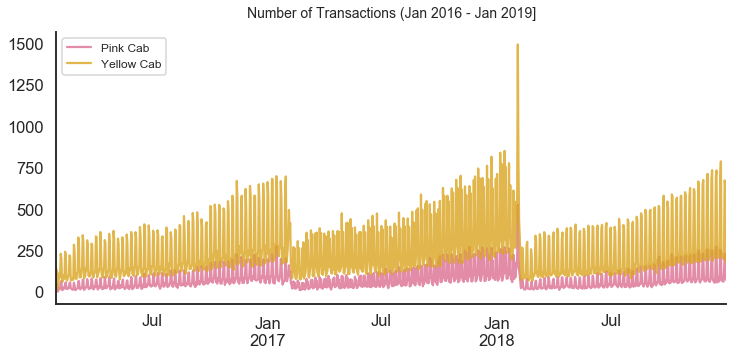

In [954]:
sns.set_context("talk")
sns.set_style("white")

Palette =["palevioletred", "goldenrod"]
sns.set_palette(Palette)

TRcounts = master_df.pivot_table(values = "Transaction ID",
                                index = "Date of Travel",
                                columns = "Company",
                                aggfunc = "count")

fig, ax = plt.subplots(figsize=(12,5))

TRcounts.plot(kind="line", ax=ax, alpha=0.8)
ax.set_title("Number of Transactions (Jan 2016 - Jan 2019]", fontsize = 14, y = 1.03)
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.legend(loc="upper left", fontsize = 12)
plt.show()

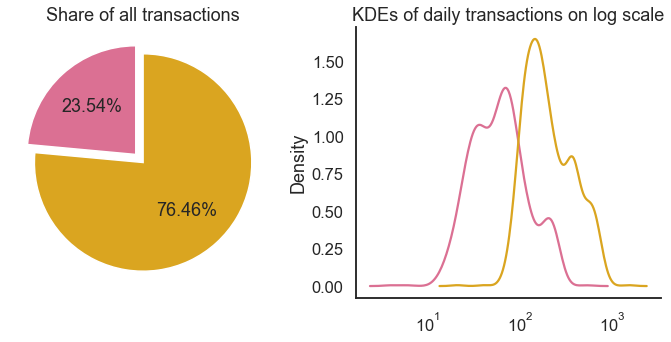

In [955]:
TRcounts_by_cab = master_df.groupby(by="Company", as_index=False)["Transaction ID"].count()

fig, axs = plt.subplots(1, 2, figsize=(12,5))

mylabels = ["",""]
myexplode = [0.1, 0]
TRcounts_by_cab.plot.pie(y="Transaction ID",
                     labels = mylabels,
                     startangle = 90,
                     explode = myexplode,
                     colors = Palette,
                     autopct='%1.2f%%',
                     ax = axs[0])

axs[0].set_title("Share of all transactions")
axs[0].set_ylabel("")
axs[0].get_legend().remove()

pink = TRcounts.values[:,0]
sns.kdeplot(x = pink, color = Palette[0], log_scale = True, ax = axs[1])
yellow = TRcounts.values[:,1]
sns.kdeplot(x = yellow, color = Palette[1], log_scale = True, ax = axs[1])

axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].set_title("KDEs of daily transactions on log scale")

plt.show()

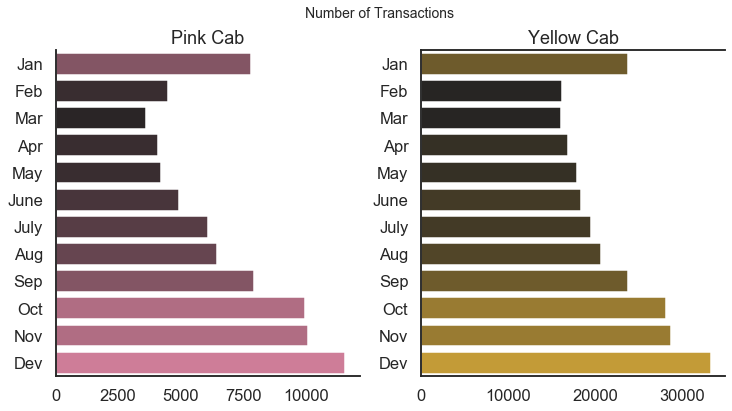

In [956]:
TRcounts_monthly = master_df.pivot_table(values="Transaction ID",
                                                index = ["Month"],
                                                columns = "Company",
                                                aggfunc = "count")

pal_p = sns.dark_palette(color = "palevioletred", n_colors=12)
pal_y = sns.dark_palette(color = "goldenrod", n_colors=12)

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

pal_pp = colors_from_values(TRcounts_monthly.values[:,0], pal_p)
pal_yy = colors_from_values(TRcounts_monthly.values[:,1], pal_y)


months = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dev"]


fig, axs = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(y = TRcounts_monthly.index,
            x =TRcounts_monthly.values[:,0],
            palette = pal_pp,
            ax = axs[0])
axs[0].set_yticklabels(months)
axs[0].set_ylabel("")
axs[0].set_title("Pink Cab")
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)

sns.barplot(y = TRcounts_monthly.index,
            x =TRcounts_monthly.values[:,1],
            palette = pal_yy,
            ax = axs[1])
axs[1].set_yticklabels(months)
axs[1].set_ylabel("")
axs[1].set_title("Yellow Cab")
axs[1].spines["right"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.suptitle("Number of Transactions", fontsize = 14)

plt.show()

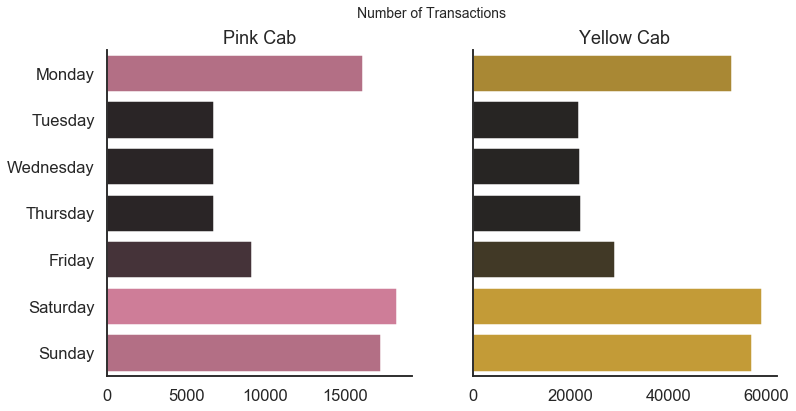

In [962]:
TRcounts_daily= master_df.pivot_table(values="Transaction ID",
                                                index = ["Weekday"],
                                                columns = "Company",
                                                aggfunc = "count", sort=False)

wkdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
TRcounts_daily = TRcounts_daily.loc[wkdays]

fig, axs = plt.subplots(1, 2, figsize=(12,6))

pal_p = sns.dark_palette(color = "palevioletred", n_colors=7)
pal_y = sns.dark_palette(color = "goldenrod", n_colors=7)
palette_pink = colors_from_values(TRcounts_daily.values[:,0], pal_p)
palette_yellow = colors_from_values(TRcounts_daily.values[:,1], pal_y)

sns.barplot(y = TRcounts_daily.index,
            x =TRcounts_daily.values[:,0],
            palette = palette_pink,
            order = wkdays,
            ax = axs[0])
axs[0].set_ylabel("")
axs[0].set_title("Pink Cab")
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)

sns.barplot(y = TRcounts_daily.index,
            x =TRcounts_daily.values[:,1],
            palette = palette_yellow,
            order = wkdays,
            ax = axs[1])
axs[1].set_ylabel("")
axs[1].set_yticks([])
axs[1].set_title("Yellow Cab")
axs[1].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)

fig.suptitle("Number of Transactions", fontsize = 14)
plt.show()

<center><font size="5"><font color='red'>**Markdown Here**</font></font>

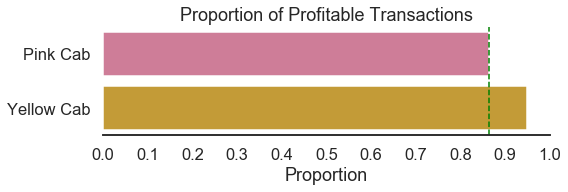

In [963]:
master_Pink = master_df[master_df["Company"] == "Pink Cab"]
master_Yellow = master_df[master_df["Company"] == "Yellow Cab"]


p = master_Pink.value_counts(subset="Profitable", normalize = True)
y = master_Yellow.value_counts(subset = "Profitable", normalize = True)

fig, ax = plt.subplots(figsize=(8,2))

sns.barplot(y = ["Pink Cab", "Yellow Cab"], x =[p.values[0], y.values[0]], dodge = False, ax = ax)

ax.set(xlabel = "Proportion", title = "Proportion of Profitable Transactions")
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlim(left=0, right=1)
ax.set_xticks(np.linspace(0,1,11))
ax.axvline(x=p.values[0], linewidth=1.5, color="green", linestyle="--")

plt.show()

In [964]:
test = master_df.pivot_table(values = "Transaction ID",
                     index = "Profitable",
                     columns = "Company",
                     aggfunc = "count")
test = test.loc[["Profitable", "Not Profitable"]]
print(test, "\n")

import scipy
stat, p, dof, expected = scipy.stats.chi2_contingency(test.values)
alpha = 0.05

print("p value is " + str("%.4f"%p))
print("alpha = " + str("%.4f"%alpha))

if p <= alpha:
    print('Rej H0: Dependent')
else:
    print('Fail to rej H0:')

Company         Pink Cab  Yellow Cab
Profitable                          
Profitable         70242      250668
Not Profitable     10972       13071 

p value is 0.0000
alpha = 0.0500
Rej H0: Dependent


<center><font size="5"><font color='red'>**Markdown Here**</font></font>

In [965]:
master_Pink_only = master_df[np.logical_and(master_df["Customer ID"].isin(master_Pink["Customer ID"]),
                                        master_df["Customer ID"].isin(master_Yellow["Customer ID"]) == False)]
master_Yellow_only = master_df[np.logical_and(master_df["Customer ID"].isin(master_Yellow["Customer ID"]),
                                        master_df["Customer ID"].isin(master_Pink["Customer ID"]) == False)]
master_Both = master_df[np.logical_and(master_df["Customer ID"].isin(master_Pink["Customer ID"]),
                                        master_df["Customer ID"].isin(master_Yellow["Customer ID"]))]
assert master_Pink_only.shape[0] + master_Yellow_only.shape[0] + master_Both.shape[0] == master_df.shape[0]

master_Pink_only["Side"] = "Pink"
master_Yellow_only["Side"] = "Yellow"
master_Both["Side"] = "Both"
master_df = pd.concat([master_Pink_only, master_Yellow_only, master_Both])

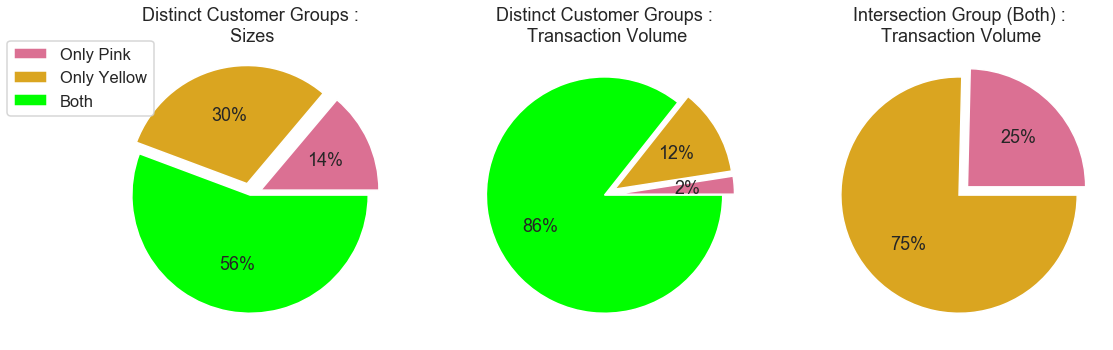

In [990]:
uniq_custs = master_df.pivot_table(values = "Customer ID",
                                   index = "Side",
                                   aggfunc = "nunique")
uniq_custs = uniq_custs.loc[["Pink", "Yellow", "Both"]]

side_trs = master_df.pivot_table(values = "Transaction ID",
                                         index = "Side",
                                         aggfunc = "count")
side_trs = side_trs.loc[["Pink", "Yellow", "Both"]]

both_trs = master_Both.pivot_table(values = "Transaction ID",
                                           index = "Company",
                                           aggfunc = "count")
both_trs = both_trs.loc[["Pink Cab", "Yellow Cab"]]

fig, axs = plt.subplots(1, 3, figsize = (18, 6))

sns.set_palette(sns.color_palette(["palevioletred","goldenrod","lime"]))
uniq_custs.plot.pie(y = "Customer ID", 
                    explode = [0.1, 0.1, 0],
                    autopct='%.0f%%',
                    labels = None,
                    ax = axs[0])
axs[0].set_ylabel("")
axs[0].set_title("Distinct Customer Groups :\n Sizes")
axs[0].legend(labels = ["Only Pink", "Only Yellow", "Both"], loc='upper left', bbox_to_anchor=(-0.35, 1.05))

side_trs.plot.pie(y = "Transaction ID",
                  autopct='%.0f%%',
                 explode = [0.1, 0.1, 0],
                 labels = None,
                 ax = axs[1])
axs[1].set_ylabel("")
axs[1].set_title("Distinct Customer Groups :\n Transaction Volume")
axs[1].get_legend().remove()

sns.set_palette(sns.color_palette(["palevioletred","goldenrod"]))
both_trs.plot.pie(y = "Transaction ID",
                  autopct='%.0f%%',
                  labels = None,
                  explode = [0.1, 0],
                  ax = axs[2])
axs[2].set_ylabel("")
axs[2].set_title("Intersection Group (Both) :\n Transaction Volume")
axs[2].legend(labels = ["Pink TRs", "Yellow TRs"], loc='upper right', bbox_to_anchor=(1.5, 0.65))
axs[2].get_legend().remove()

plt.show()

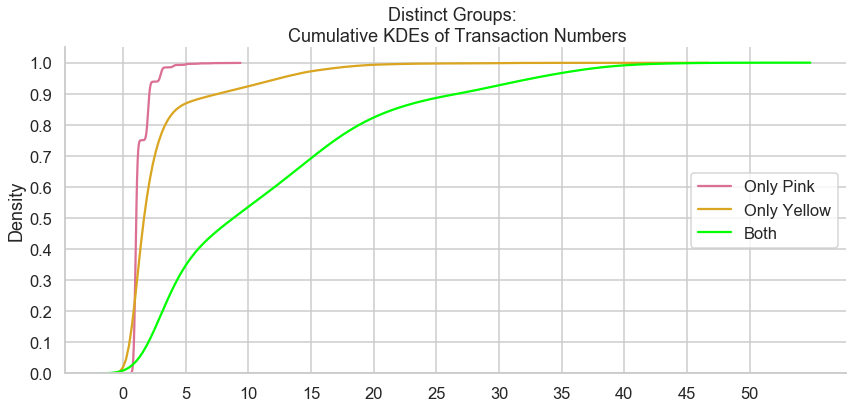

In [991]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,6))


tr_by_cust = master_df.pivot_table(values = "Transaction ID",
                                  index = "Customer ID",
                                  columns = "Side",
                                  aggfunc = "count")

tr_by_cust = tr_by_cust.loc[:, ["Pink","Yellow","Both"]]

pink = tr_by_cust.values[:,0]
pink = pink[pink > 0]
yellow = tr_by_cust.values[:,1]
yellow = yellow[yellow > 0]
both = tr_by_cust.values[:,2]
both = both[both > 0]

sns.kdeplot(x = pink, color="palevioletred", ax = ax, label = "Only Pink", cumulative = True)
sns.kdeplot(x = yellow, color="goldenrod", ax = ax, label = "Only Yellow", cumulative = True)
sns.kdeplot(x = both, color="lime", ax = ax, label = "Both", cumulative = True)


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
ax.set_yticks(np.linspace(0,1,11))
ax.set_title("Distinct Groups: \n Cumulative KDEs of Transaction Numbers")
ax.legend(loc = "center right")
# ax.grid()

plt.show()

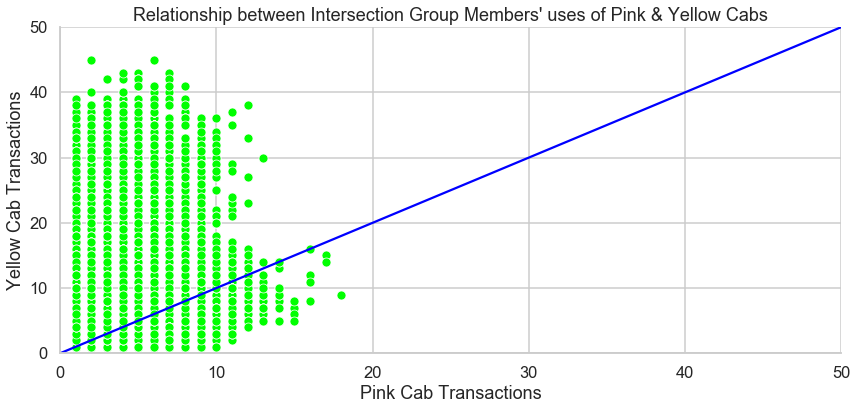

In [992]:
# 1- Group "Both" > scatterplot(Pink Usage, Yellow Usage)
tr_by_cust_both = master_Both.pivot_table(values = "Transaction ID",
                                  index = "Customer ID",
                                  columns = "Company",
                                  aggfunc = "count")
pink = tr_by_cust_both.values[:,0]
yellow = tr_by_cust_both.values[:,1]
pink = pink[pink > 0]
yellow = yellow[yellow > 0]

fig, ax = plt.subplots(figsize = (14,6))
sns.scatterplot(x=pink, y=yellow, color = "lime", ax = ax)

ax.set_xlabel("Pink Cab Transactions")
ax.set_xlim(left=0)
ax.set_xticks([0, 10, 20, 30, 40, 50])

ax.set_ylabel("Yellow Cab Transactions")
ax.set_ylim(bottom=0)
ax.set_yticks([0, 10, 20, 30, 40, 50])

ax.plot([0,10],[0,10], transform=ax.transAxes, color = "blue")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.grid(lw = 1.5)
ax.set_title("Relationship between Intersection Group Members' uses of Pink & Yellow Cabs")

plt.show()

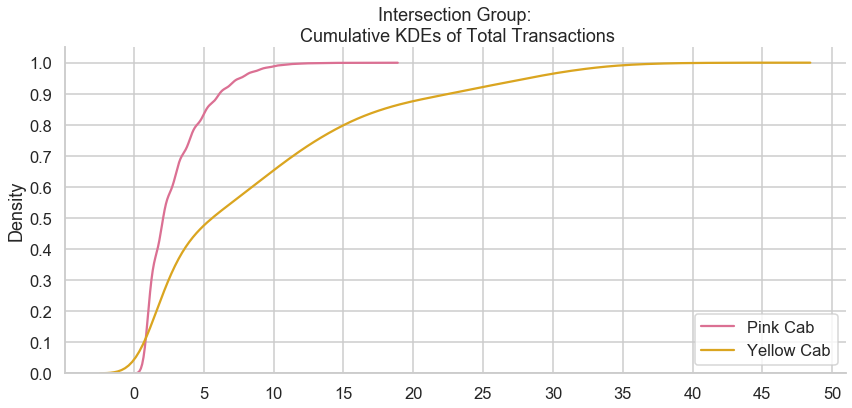

In [974]:
# 2- Group "Both" > CumulativeKde(Total TR)
fig, ax = plt.subplots(figsize = (14,6))

sns.kdeplot(x = pink, ax = ax, label = "Pink Cab", cumulative = True)
sns.kdeplot(x = yellow, ax = ax, label = "Yellow Cab", cumulative = True)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
ax.set_yticks(np.linspace(0,1,11))

# ax.grid()
ax.legend()
ax.set_title("Intersection Group:\n Cumulative KDEs of Total Transactions")

plt.show()

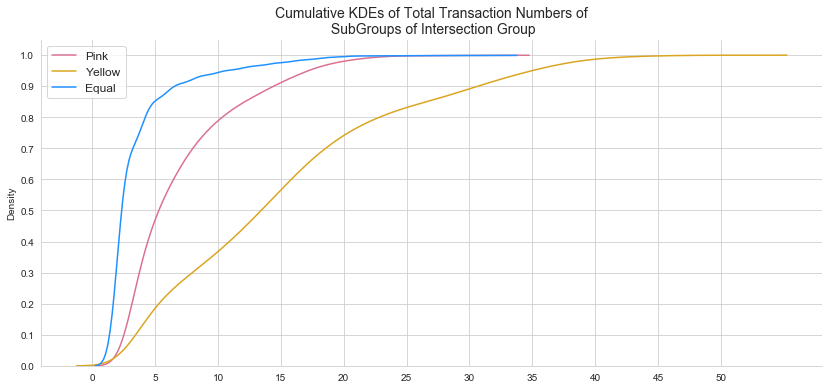

In [939]:
# 3- Subgroup(both) > CumulativeKde(Total TR)
labeled_both = master_df[master_df["Side"] == "Both"].pivot_table(values="Transaction ID",
                                                  index = "Customer ID",
                                                  columns = "Company",
                                                  aggfunc = "count").reset_index()
labeled_both = labeled_both[np.logical_and(labeled_both["Pink Cab"] > 0, labeled_both["Yellow Cab"] > 0)]
labeled_both["Favours"] = labeled_both["Pink Cab"] - labeled_both["Yellow Cab"]

def my_func(val):
    if val < 0:
        new = "Yellow"
    elif val == 0:
        new = "Equal"
    else:
        new = "Pink"
    return new

labeled_both["Favours"] = labeled_both["Favours"].apply(my_func)

cid_both_equal = labeled_both[labeled_both["Favours"] == "Equal"]["Customer ID"]
cid_both_pink = labeled_both[labeled_both["Favours"] == "Pink"]["Customer ID"]
cid_both_yellow = labeled_both[labeled_both["Favours"] == "Yellow"]["Customer ID"]

mst_equal = master_Both[master_Both["Customer ID"].isin(cid_both_equal)]
mst_equal["Favours"] = "Equal"

mst_pink = master_Both[master_Both["Customer ID"].isin(cid_both_pink)]
mst_pink["Favours"] = "Pink"

mst_yellow = master_Both[master_Both["Customer ID"].isin(cid_both_yellow)]
mst_yellow["Favours"] = "Yellow"

master_Both = pd.concat([mst_equal, mst_pink, mst_yellow])

master_Pink_only["Favours"] = "PINK"
master_Yellow_only["Favours"] = "YELLOW"

master_df = pd.concat([master_Pink_only, master_Yellow_only, master_Both])




pink = master_Both[master_Both["Favours"] == "Pink"].pivot_table(values = "Transaction ID",
                                                          index = "Customer ID",
                                                         aggfunc = "count")
pink = pink[pink["Transaction ID"] != 0]

yellow = master_Both[master_Both["Favours"] == "Yellow"].pivot_table(values = "Transaction ID",
                                                          index = "Customer ID",
                                                         aggfunc = "count")
yellow = yellow[yellow["Transaction ID"] != 0]

equal = master_Both[master_Both["Favours"] == "Equal"].pivot_table(values = "Transaction ID",
                                                          index = "Customer ID",
                                                         aggfunc = "count")
equal = equal[equal["Transaction ID"] != 0]

fig, axs = plt.subplots(figsize = (14,6))

sns.kdeplot(x = pink.values.flatten(), color = "palevioletred",  cumulative = True, ax = axs, label = "Pink")
sns.kdeplot(x = yellow.values.flatten(), color = "goldenrod", cumulative = True, ax = axs, label = "Yellow")
sns.kdeplot(x = equal.values.flatten(), color = "dodgerblue",  cumulative = True, ax = axs, label = "Equal")

axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
axs.set_yticks(np.linspace(0,1,11))
# axs.grid()

axs.set_title("Cumulative KDEs of Total Transaction Numbers of\n SubGroups of Intersection Group", fontsize = 14)
axs.legend(fontsize = 12)

plt.show()

<center><font size="5"><font color='red'>**Markdown Here**</font></font>

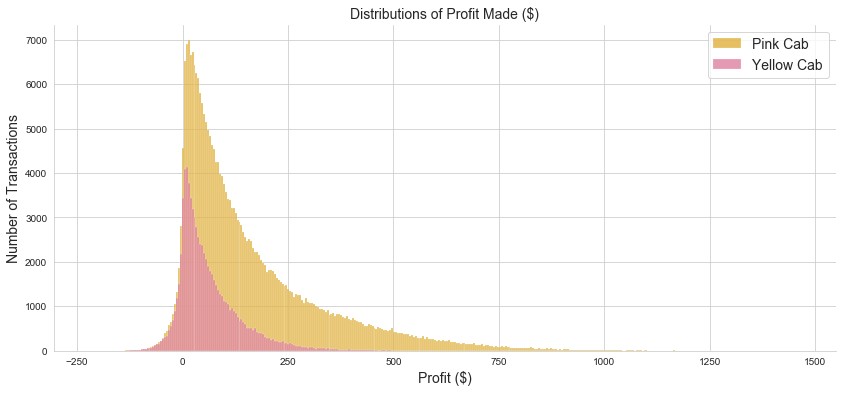

In [942]:
fig, axs = plt.subplots(figsize = (14,6))

sns.histplot(data=master_df,
             x="Profit",
             hue="Company",
             palette = ["palevioletred", "goldenrod"],
             alpha = 0.7,
             ax = axs)

axs.set_xlabel("Profit ($)", fontsize = 14)
axs.set_ylabel("Number of Transactions", fontsize = 14)
axs.spines["right"].set_visible(False)
axs.spines["top"].set_visible(False)
axs.set_title("Distributions of Profit Made ($)", fontsize = 14)
axs.legend(labels = ["Pink Cab", "Yellow Cab"], loc = "center top", fontsize = 14)

plt.show()